In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
TD = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None)
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)

classes = np.genfromtxt('data/newsgroups5/classes.txt',delimiter=' ', dtype=int, skip_header=1, usecols=(1))



In [44]:
term_list = pd.Series(terms[0], name='Term')

In [ ]:
terms

In [10]:
print('\n TD ',TD.shape,'\n terms ',terms.shape,'\n classes ',classes.shape)


 TD  (9328, 2500) 
 terms  (9328, 1) 
 classes  (2500,)


In [11]:
TD.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
classes.size

2500

In [16]:
classes

array([0, 1, 1, ..., 3, 4, 2])

### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [169]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist

def calculateCosineSimilarityDistance(x,D):
    
    D_norm = np.linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist



### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [170]:
matrix = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None)
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)
classes = np.genfromtxt('data/newsgroups5/classes.txt',delimiter=' ', dtype=int, skip_header=1, usecols=(1))


In [171]:
matrixT = matrix.T


In [172]:
print('\n matrix ',matrix.shape,'\n terms ',terms.shape,'\n classes ',classes.shape," matrixT ",matrixT.shape)


 matrix  (9328, 2500) 
 terms  (9328, 1) 
 classes  (2500,)  matrixT  (2500, 9328)


In [173]:
matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
count,9.33e+03,9.33e+03,9328.00,9328.00,9328.00,9.33e+03,9328.00,9328.00,9328.00,9.33e+03,...,9.33e+03,9.33e+03,9.33e+03,9.33e+03,9328.00,9.33e+03,9.33e+03,9.33e+03,9.33e+03,9328.00
mean,7.61e-03,5.15e-03,0.03,0.02,0.02,4.72e-03,0.02,0.01,0.01,6.43e-03,...,6.00e-03,5.15e-03,8.15e-03,8.90e-03,0.01,8.58e-03,3.86e-03,7.50e-03,1.82e-03,0.02
std,1.29e-01,8.40e-02,0.29,0.29,0.23,8.40e-02,0.24,0.13,0.13,9.47e-02,...,8.39e-02,8.52e-02,1.12e-01,1.34e-01,0.17,1.11e-01,7.46e-02,1.05e-01,4.96e-02,0.19
min,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00
25%,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00
50%,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00
75%,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00
max,8.00e+00,3.00e+00,12.00,20.00,7.00,3.00e+00,12.00,5.00,5.00,4.00e+00,...,2.00e+00,4.00e+00,4.00e+00,6.00e+00,6.00,3.00e+00,3.00e+00,3.00e+00,2.00e+00,9.00


In [174]:
 matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Columns: 2500 entries, 0 to 2499
dtypes: int64(2500)
memory usage: 177.9 MB


In [175]:
classes.shape

(2500,)

In [176]:
vs_matrix = np.mat(matrix)
vs_matrix.shape

(9328, 2500)

In [177]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(matrixT, classes, test_size=0.2, random_state=33)


In [178]:
print("train : ",vs_train.shape)
print("Test : ",vs_test.shape)


train :  (2000, 9328)
Test :  (500, 9328)


### 2.c Perform Kmeans clustering on the training data

In [179]:
## get random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [180]:
%%time
data = np.mat(vs_train)
#centroids = randCent(vs_train,2)

Wall time: 19 ms


In [181]:
def kmeans(D,k,distMeas=calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    
    ## cluster assignment matrix with 2 cols. one for cluster index and 2nd one for cluster error (distance from cluster centroid to the current point)
    clusterAssment = np.mat(np.zeros((m,2)))
    
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        ## loop over data points and assign assign it to the closest centroid
        for i in range(m):
            minDIst = np.inf;
            minIndex = -1;
            for j in range(k):
                distJI = distMeas(centroids[j,:],D[i,:])
                ##print('Distance ',distJI)
                if(distJI < minDIst):
                    minDIst = distJI;
                    minIndex = j;
            if clusterAssment[i,0] !=minIndex : clusterChanged = True
            clusterAssment[i,:] = minIndex, minDIst**2
        #print(" centroids : ",centroids)
        
        ## update the centroid
        for cent in range(k):
            ptsInClust = D[np.nonzero(clusterAssment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids, clusterAssment

In [182]:
%%time
data = np.mat(vs_train)
centroids, clusterAssment = kmeans(data,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[ 0.19  0.03 15.76 ...  0.25  0.02  0.81]
 [ 0.81  0.16 34.7  ...  0.36  0.81  1.  ]
 [ 0.48  0.86 18.63 ...  1.08  0.38  0.17]
 [ 0.06  0.89 37.94 ...  1.11  0.5   1.71]
 [ 0.38  0.5  43.64 ...  1.38  0.54  1.46]]


M:\apps\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
M:\apps\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-181-e4a2d4a73a0a>:20: RuntimeWarning: invalid value encountered in less
  if(distJI < minDIst):


Wall time: 3min 26s


In [183]:
centroids.shape

(5, 9328)

In [184]:
## some test code to check out data/objects that will be used in the cluster report 
temp = pd.DataFrame(clusterAssment)
t1 = vs_train.index[temp[0]==0]
print(t1)

print(vs_train[vs_train.index.isin(t1)])
print("\n centroids : \n",centroids[0,:])

print("\nterms \n",pd.Series(terms[0], name='Term'))

Int64Index([], dtype='int64')
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 9328 columns]

 centroids : 
 [nan nan nan ... nan nan nan]

terms 
 0           aa
1        aargh
2        aaron
3       aaronc
4           ab
         ...  
9323     zubov
9324        zv
9325        zw
9326        zx
9327        zz
Name: Term, Length: 9328, dtype: object


#### Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster

In [185]:
def cluster_report(data, clusters, centroids):
    clustersDF = pd.DataFrame(clusters)
    term_list = pd.Series(terms[0], name='Term')
    
    cluster_labels = np.unique(clustersDF[0])
    result = {}
    size ={}
    for c in cluster_labels:
        c = int(c)
        
        ## get the index of the train data from cluster c
        cl_data = vs_train.index[clustersDF[0]==c]

        # gen centroids/frequency for the current (ith) cluster
        centroid = pd.Series(centroids[c], name='Freq')

        cl_size = len(cl_data)
        size[c] = cl_size
        
        ## doc by term
        docs_from_cluster = vs_train[vs_train.index.isin(cl_data)]

        ## term by doc
        docs_from_cluster = docs_from_cluster.T

        ## count all non zero terms
        DF = (pd.DataFrame([(docs_from_cluster!=0).sum(1)]).T)

        ## if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, 
        ##then DF value of "game" in that cluster is 0.2 or 20%
        DF = DF / size[c]
        ## divide each term count by number of docs in cluser
        
        DF.columns=['DF']
        
        DF_PERCENT = DF.copy()
        DF_PERCENT = DF_PERCENT * 100
        DF_PERCENT.columns=['% of Docs']
        ##print("docs_from_cluster \n",docs_from_cluster)

        ## concatenate the terms, centroid and DF values for the cluster
        term_centroid = pd.concat([term_list, centroid,DF,DF_PERCENT],axis=1)
        
        result[c] = term_centroid
    return result , size

def display_clusters(clusterDict, clusterSize, numTerms):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="DF", ascending=False).head(numTerms))
    return


In [186]:
vs_train = pd.DataFrame(vs_train)
clusterDict_nonidf , clusterSize_nonidf = cluster_report(vs_train,clusterAssment,centroids)
print(clusterDict_nonidf.keys())

print("\ncluster# :: # of docs")
for key in clusterSize_nonidf.keys():
      print(key," \t :: ",clusterSize_nonidf[key])

dict_keys([1, 2, 3, 4])

cluster# :: # of docs
1  	 ::  805
2  	 ::  789
3  	 ::  400
4  	 ::  6


In [187]:
numOfTopNTerms = 10
display_clusters(clusterDict_nonidf,clusterSize_nonidf,numOfTopNTerms)


Cluster  1 size = 805
----------------------------------------------
         Term  Freq    DF  % of Docs
7895  subject  1.12  1.00     100.00
9129    write  0.89  0.67      66.71
5795       on  1.20  0.53      52.55
417    articl  0.67  0.51      50.93
6049    peopl  0.89  0.39      39.01
4449     know  0.68  0.38      37.52
8203    think  0.62  0.37      36.77
4319     just  0.55  0.35      35.40
8255     time  0.51  0.31      30.68
3266      get  0.51  0.30      30.06

Cluster  2 size = 789
----------------------------------------------
         Term  Freq    DF  % of Docs
7895  subject  1.05  1.00     100.00
9025   window  1.11  0.38      37.52
8174    thank  0.31  0.29      28.77
2550    email  0.35  0.28      28.14
6207    pleas  0.33  0.27      27.38
7115     sale  0.44  0.27      27.25
9129    write  0.36  0.26      26.36
5795       on  0.44  0.25      25.10
3266      get  0.38  0.25      24.71
9084     work  0.37  0.23      23.32

Cluster  3 size = 400
-----------------------

In [188]:
## Repeating the above with DT_IDF

In [189]:
termFreqs = TD.sum(axis=1).astype(np.int64)
termFreqs.shape

(9328,)

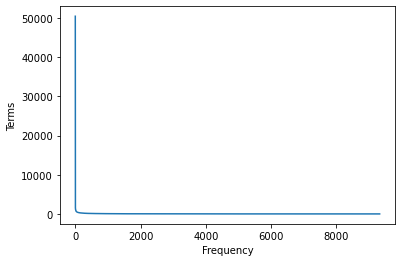

In [190]:
plt.plot(sorted(termFreqs, reverse=True))
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

In [191]:
#### indicates most the terms are non repetetive


In [192]:
DT = TD.T
DT

numTerms=TD.shape[0]
NDocs = TD.shape[1]

print("numTerms ",numTerms," NDocs ",NDocs)

# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term

DF = pd.DataFrame([(TD!=0).sum(1)]).T
print(DF.shape)

# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

np.set_printoptions(precision=2,suppress=True)
print(IDF)

pd.set_option("display.precision", 2)

# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

print("TD_tfidf",TD_tfidf)

DT_tfidf = TD_tfidf.T
DT_tfidf = np.mat(DT_tfidf)

print("DT_tfidf.shape :",DT_tfidf.shape)

numTerms  9328  NDocs  2500
(9328, 1)
[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]
TD_tfidf       0     1     2     3     4     5     6     7     8     9     ...  2490  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [193]:
from sklearn.model_selection import train_test_split
vs_train_df, vs_test_idf, vs_target_train_idf, vs_target_test_idf = train_test_split(DT_tfidf, classes, test_size=0.2, random_state=33)


In [194]:
print("vs_train_df : ",vs_train_df.shape)
print("vs_test_idf : ",vs_test_idf.shape)


vs_train_df :  (2000, 9328)
vs_test_idf :  (500, 9328)


In [203]:
%%time
data = np.mat(vs_train_df)
centroids, clusterAssment = kmeans(data,5)

print(" clusterAssment : ",clusterAssment.shape)
print(" centroids : ",centroids.shape)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[  4.99   6.46  37.62 ...  16.95   0.98   7.28]
 [  7.09   6.16  46.83 ...   8.62   3.84  29.34]
 [  2.33   7.1  148.54 ...  12.71   9.09  31.44]
 [  4.16   1.65 157.96 ...   6.97   0.38  14.03]
 [  3.08   6.46 139.8  ...   0.38   9.38  28.5 ]]
 clusterAssment :  (2000, 2)
 centroids :  (5, 9328)
Wall time: 3min 21s


In [204]:
vs_train_df = pd.DataFrame(vs_train_df)
clusterDict , clusterSize = cluster_report(vs_train_df,clusterAssment,centroids)
print(clusterDict.keys())

print("\ncluster# :: # of docs")
for key in clusterSize.keys():
      print(key," \t :: ",clusterSize[key])
        


dict_keys([0, 1, 2, 3, 4])

cluster# :: # of docs
0  	 ::  8
1  	 ::  1186
2  	 ::  7
3  	 ::  792
4  	 ::  7


In [205]:
numOfTopNTerms = 10
display_clusters(clusterDict,clusterSize,numOfTopNTerms)


Cluster  0 size = 8
----------------------------------------------
         Term      Freq    DF  % of Docs
7895  subject      0.00  1.00      100.0
547        ax  41973.81  0.88       87.5
4982      max   2877.51  0.88       87.5
8336       tq     44.81  0.75       75.0
5375      mtm     31.08  0.75       75.0
802        bj     43.01  0.75       75.0
4722       lj     29.40  0.75       75.0
5428      mwt     20.14  0.75       75.0
9144       wt     34.14  0.75       75.0
9155     wwiz     22.26  0.75       75.0

Cluster  1 size = 1186
----------------------------------------------
         Term  Freq    DF  % of Docs
7895  subject  0.00  1.00     100.00
9129    write  0.60  0.41      41.32
5795       on  0.82  0.34      33.64
417    articl  0.58  0.30      30.27
3266      get  0.82  0.28      27.74
4449     know  0.70  0.26      25.97
9025   window  2.05  0.25      25.21
9084     work  0.88  0.24      24.03
4319     just  0.63  0.24      23.78
2550    email  0.93  0.24      23.78

Cl

## going forward I will be using the td-idf data set (vs_train_df, vs_test_idf, vs_target_train_idf, vs_target_test_idf)

### 2c EXTRA CREDIT -  pip install wordcloud or conda install -c conda-forge wordcloud 

In [206]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [402]:
?WordCloud

In [207]:
cluster_numbers = set(np.ravel(clusterAssment[:,0]))
terms_array = np.array(terms)
datClusMap = {}

t_list = list(terms_array.T[0])

# iterate through cluster
for i in cluster_numbers:
        ## get all docuemnts cor cluster# i
        dT = pd.DataFrame(vs_train_df[np.ravel(clusterAssment[:,0]==int(i))])
        # rename/attach name to the columns
        dT.columns = terms_array.T[0]
        
        ## evaluate the term frequency
        term_freq = list(np.array((dT.T!=0).sum(1).T))
        
        ## get the terms present in the clsuer documents i.e. for which value is not zero
        cluster_term_list=term_list[np.ravel(np.nonzero(term_freq))]
        
        # using list comprehension- concatenate all present terms/words into one giant string for word cloud
        cluster_terms = ' '.join(map(str, cluster_term_list)) 
        
        datClusMap['C'+str(int(i))] = cluster_terms

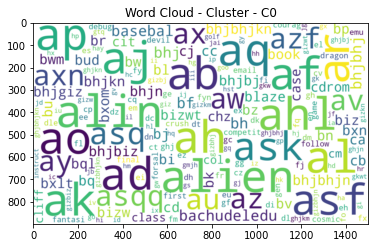

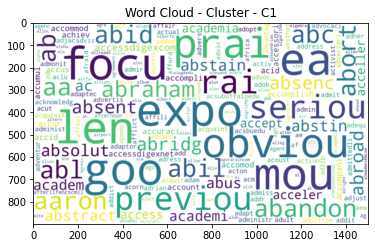

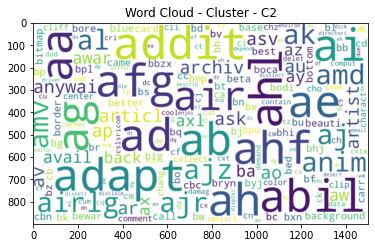

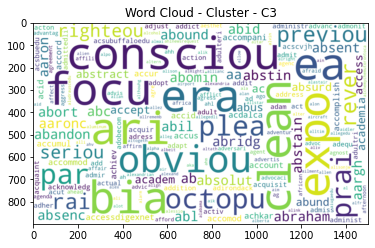

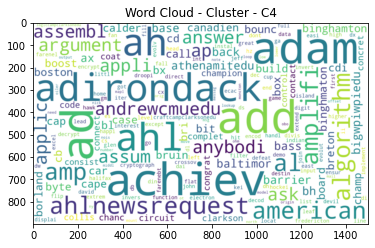

In [208]:
for key in datClusMap.keys():
    word_cloud_img = WordCloud(max_font_size=200, width=1500, height=900, background_color='white').generate(datClusMap.get(key))
    plt.imshow(word_cloud_img,interpolation="bilinear")
    plt.title('Word Cloud - Cluster - '+key)
    plt.show()

### 2d Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [209]:
vs_target_train_idf

array([4, 0, 4, ..., 2, 0, 1])

In [210]:
clusterAssment.T[0]

matrix([[1., 1., 1., ..., 3., 1., 1.]])

In [211]:
from sklearn.metrics import completeness_score, homogeneity_score

#NOTE: this generates a random score every time you run the cluster
print("completeness_score = ",completeness_score(vs_target_train_idf,np.ravel(clusterAssment.T[0])))
print("homogeneity_score = ",homogeneity_score(vs_target_train_idf,np.ravel(clusterAssment.T[0])))

completeness_score =  0.7812677274231191
homogeneity_score =  0.3584735918630905


### 2e Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [214]:
print(centroids.shape)
print(centroids)
print("vs_test_idf shape ",vs_test_idf.shape)

(5, 9328)
[[0.   0.   0.   ... 1.21 0.   0.  ]
 [0.03 0.   0.04 ... 0.   0.   0.  ]
 [2.28 0.   0.   ... 2.77 1.39 7.96]
 [0.01 0.04 0.57 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
vs_test_idf shape  (500, 9328)


In [229]:
%%time
results = []

class_dict={}
class_dict[0]='windows'
class_dict[1]='crypt'
class_dict[2]='christian'
class_dict[3]='hockey'
class_dict[4]='forsale'
vs_test = np.array(vs_test_idf)
for doc in vs_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        #print("d ",doc)
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        #print("val ",val)
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster + 1)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1
        
    dic['Predicted Cluster'] = sim.index(max(sim))
    dic['Predicted Cluster (label)'] = class_dict.get(sim.index(max(sim)))
    
    results.append(dic)

test_cluster = pd.DataFrame(results)

Wall time: 162 ms


In [230]:
pd.options.display.max_rows = 500
print("Categorized test data shape ",test_cluster.shape)
print("class label mapping\n",class_dict)

test_cluster

Categorized test data shape  (500, 7)
class label mapping
 {0: 'windows', 1: 'crypt', 2: 'christian', 3: 'hockey', 4: 'forsale'}


,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster,Predicted Cluster (label)
0,2.9547350820502416e-06,0.04545399209120793,0.0008731275426437923,0.09789156278347155,0.0007186625788240253,3,hockey
1,8.960421146841924e-06,0.10950241375918601,0.0023773095268455613,0.1329778013136922,0.001274021116497659,3,hockey
2,1.3990352541237705e-05,0.03545049054198668,0.02582963033192809,0.018226508840684996,0.0006188796914031736,1,crypt
3,7.745003989034771e-06,0.19204656463449654,0.003921696804954022,0.11123026013477721,0.0018055135038328451,1,crypt
4,3.054977594107999e-05,0.07630270380351933,0.004004840642826246,0.0723697890744528,0.0016021096971580162,1,crypt
5,6.423619372752931e-06,0.26987949971097036,0.0019987994234869078,0.10012699635752031,0.003530374525765212,1,crypt
6,5.317330746046345e-06,0.10540732120799623,0.0013586019562302765,0.21545627912461984,0.0065390592555586435,3,hockey
7,5.940136604043467e-06,0.09146426933826113,0.00067365804932773,0.06764086815934722,0.0020107330180384464,1,crypt
8,5.843582421838356e-06,0.11674282666317881,0.001910627882604654,0.367863679282208,0.0028955843473004172,3,hockey
9,0.0,0.05473715298177173,0.001930127973218898,0.10968308406935323,0.0009277706161749943,3,hockey
